### Initialize Google Earth Engine

Before we can start using Google Earth Engine (GEE) in our Python environment, we need to authenticate and initialize it.


In [1]:
import ee

ee.Authenticate()
ee.Initialize()

### Import Functions from the Custom Timeseries Module

In this step, we import the necessary functions from our custom `timeseries` module. This module contains the definitions for our area of interest (AOI), NDVI calculation, mean NDVI calculation for the AOI, and the creation of a DataFrame from the NDVI data.

In [2]:
from timeseries import aoi, ndvi, aoi_ndvi_mean, create_ndvi_mean_dataframe
import matplotlib.pyplot as plt

In [3]:
# Create an ImageCollection object from the Landsat 8 collection
# "LANDSAT/LC08/C02/T1_TOA" refers to the Landsat 8 Collection 2 Tier 1 Top of Atmosphere Reflectance data

image_collection = ee.ImageCollection("LANDSAT/LC08/C02/T1_TOA").filterDate("2020-01-01", "2021-01-01").filterBounds(aoi)

In [4]:
%%time

# Apply the NDVI calculation to each image in the image collection
# The map method applies the ndvi function to each image in the collection

ndvi_collection = image_collection.map(ndvi)

CPU times: user 445 µs, sys: 1 µs, total: 446 µs
Wall time: 448 µs


In [5]:
%%time

# Calculate the mean NDVI for the specified AOI for each image in the NDVI collection
# The map method applies the aoi_ndvi_mean function to each image in the NDVI collection,

mean_ndvi_features = ndvi_collection.map(aoi_ndvi_mean).getInfo()

CPU times: user 4.55 ms, sys: 614 µs, total: 5.16 ms
Wall time: 1.27 s


In [6]:
%%time

# Create a pandas DataFrame from the feature collection containing mean NDVI values and dates

ndvi_mean_df = create_ndvi_mean_dataframe(mean_ndvi_features)

CPU times: user 1.57 ms, sys: 920 µs, total: 2.49 ms
Wall time: 2.37 ms


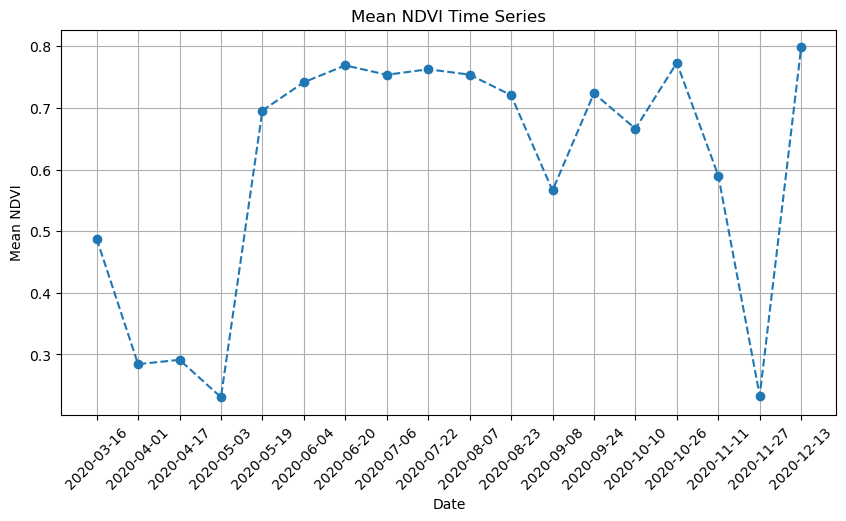

In [7]:
plt.figure(figsize=(10, 5))
plt.plot(ndvi_mean_df['Date'], ndvi_mean_df['Mean_NDVI'], marker='o', linestyle='--')
plt.title('Mean NDVI Time Series')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Mean NDVI')
plt.grid(True)
plt.show()